# ***`Capstone Modul 3 Ecommerce Churn`***

# **Business Backgoruond and Problem**

## *`Background`*

Ecommerce has significantly growth in the past few years, fueled by advancements of technology and changing consumer preferences. It offers convenience, simplicity, wide product selection, competitive pricing, and personalized experiences. As the ecommerce trend and needs rocketing, it is quite a tough challange for all players to be able generate strategies to retain customers. Ecommerce churn rates have become a critical metric for businesses, influencing profitability and growth. Factors such as customer experience, product and promotional competition play significant role in customer retention. Analyzing churn patterns helps optimize strategies and mitigate revenue loss.

## *`Problem Statement`*

Nowadays in the era of ecommerce competition it is quite challenging to retain customer loyality due to the plenty variety of ecommerce platform. The method to keep them useing the platform sometimes will cost the company more. Considering there are also many variable to retain customer such as personalization, exelence customer experience and proactive retention campaigns, these methods will be time consuming and not really efficient if the customer identified as they are who already leaving the platform or we called it Churn.

## *`Goals`*

Based on the problem, company willing to know the best way to predict the customer whether they will churn or not, so the strategic team able to focus on them who predicted as potential churn and how to prevent them being churn. Furthermore the company able to capture what are the factors or variables that contribute the more to leads customer's churn, this will helps strategic team to avoid strategies that might not works on contributing to customer retention.

## *`Analytical Approach`*

This project will highlight on how ecommerce company be able to predict churn, using classificaation model that would capture customer's patern and predict wether they tend to be churn or not churn.

## *`Evaluation Metric`*

Target of this machine learning is to flag the churn, by that **churn** is the *positive* condition and **not churn** is the *negative*
- Class 1 : Churn
- Class 0 : Not Churn
<br>
<br>

False Positive : Predicted = churn, Actual = not churn<br>
**False Negative : Predicted = not churn, Actual = churn**

In this case False Negative con is leads to generate more risk to the company if we could not predict the actual chun, by that we consider to **reduce Fals Negative Rate** hence the metric evaluation needed is ***Recall***

# **Import Library and Load Dataset**

In [1]:
# Library

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno

# Train test split
from sklearn.model_selection import train_test_split

# Preprocess
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Imbalance treatment
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Models algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# Feature Importances
from sklearn.inspection import permutation_importance

# Crossvalidation & tuning
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

# Metrics evaluation
from sklearn.metrics import f1_score, recall_score, classification_report, confusion_matrix, precision_recall_curve

# Warning
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Rows Setting

# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [3]:
# Load data

df = pd.read_csv('data_ecommerce_customer_churn.csv')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


# **Data Understanding**

The data has 3941 and 11 columns 
<br>
Data Attribute:<br> 

**Tenure**: Tenure of a customer in the company.<br>
**WarehouseToHome**: Distance between the warehouse to the customer’s home.<br>
**NumberOfDeviceRegistered**: Total number of deceives is registered on a particular customer.<br>
**PreferedOrderCat**: Preferred order category of a customer in the last month.<br>
**SatisfactionScore**: Satisfactory score of a customer on service.<br>
**MaritalStatus**: Marital status of a customer.<br>
**NumberOfAddress**: Total number of added on a particular customer.<br>
**Complaint**: Any complaint has been raised in the last month.<br>
**DaySinceLastOrder**: Day since last order by customer.<br>
**CashbackAmount**: Average cashback in last month.<br>
**Churn**: Churn flag.<br>

## *`Data Description`*

In [4]:
# Columns Description
def dataDesc():
    listItem = []
    for col in df.columns :
        listItem.append(
            [col, 
            df[col].dtype,
            df[col].isna().sum(),
            round(df[col].isna().sum()/len(df)*100,2),
            df[col].nunique(),
            list(df[col].drop_duplicates().sample(2).values),
            df[col].min(),
            df[col].max()]
        )
    descData = pd.DataFrame(data = listItem,
                            columns = ['Column','Data Type', 'Missing Value',
                                        'Pct Missing Value', 'Num Unique', 'Unique Sample','Min Val','Max val'])
    return descData
    
dataDesc()

,Column,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample,Min Val,Max val
0,Tenure,float64,194,4.92,36,"[14.0, 31.0]",0.0,61.0
1,WarehouseToHome,float64,169,4.29,33,"[34.0, 28.0]",5.0,127.0
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[3, 5]",1,6
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile]",Fashion,Others
4,SatisfactionScore,int64,0,0.00,5,"[3, 2]",1,5
5,MaritalStatus,object,0,0.00,3,"[Single, Divorced]",Divorced,Single
6,NumberOfAddress,int64,0,0.00,14,"[5, 6]",1,22
7,Complain,int64,0,0.00,2,"[0, 1]",0,1
8,DaySinceLastOrder,float64,213,5.40,22,"[14.0, 1.0]",0.0,46.0
9,CashbackAmount,float64,0,0.00,2335,"[177.25, 178.79]",0.0,324.99


We can see all the info needed from the raw data above, the initial data description let us aware of missing values in some columns around *4-5%* and there are also columuns that has big value range. It seems we need to do missing value treatment and scaling for the raw data

# **Data Cleaning**

In this cleaning step we need to ensure that the dataset is ready for analysis and preprocesing steps then proceed to modeling, thus we will do outliers checking and removing, missing value replacement, and removing duplicate row.

## *`Outliers`*

To check outliers we plot all the columns using boxplot, thus we can visualize the outliers whether it contains extreme outliers or tolerable outliers. We will visualizing all the features (x) out of the dataset

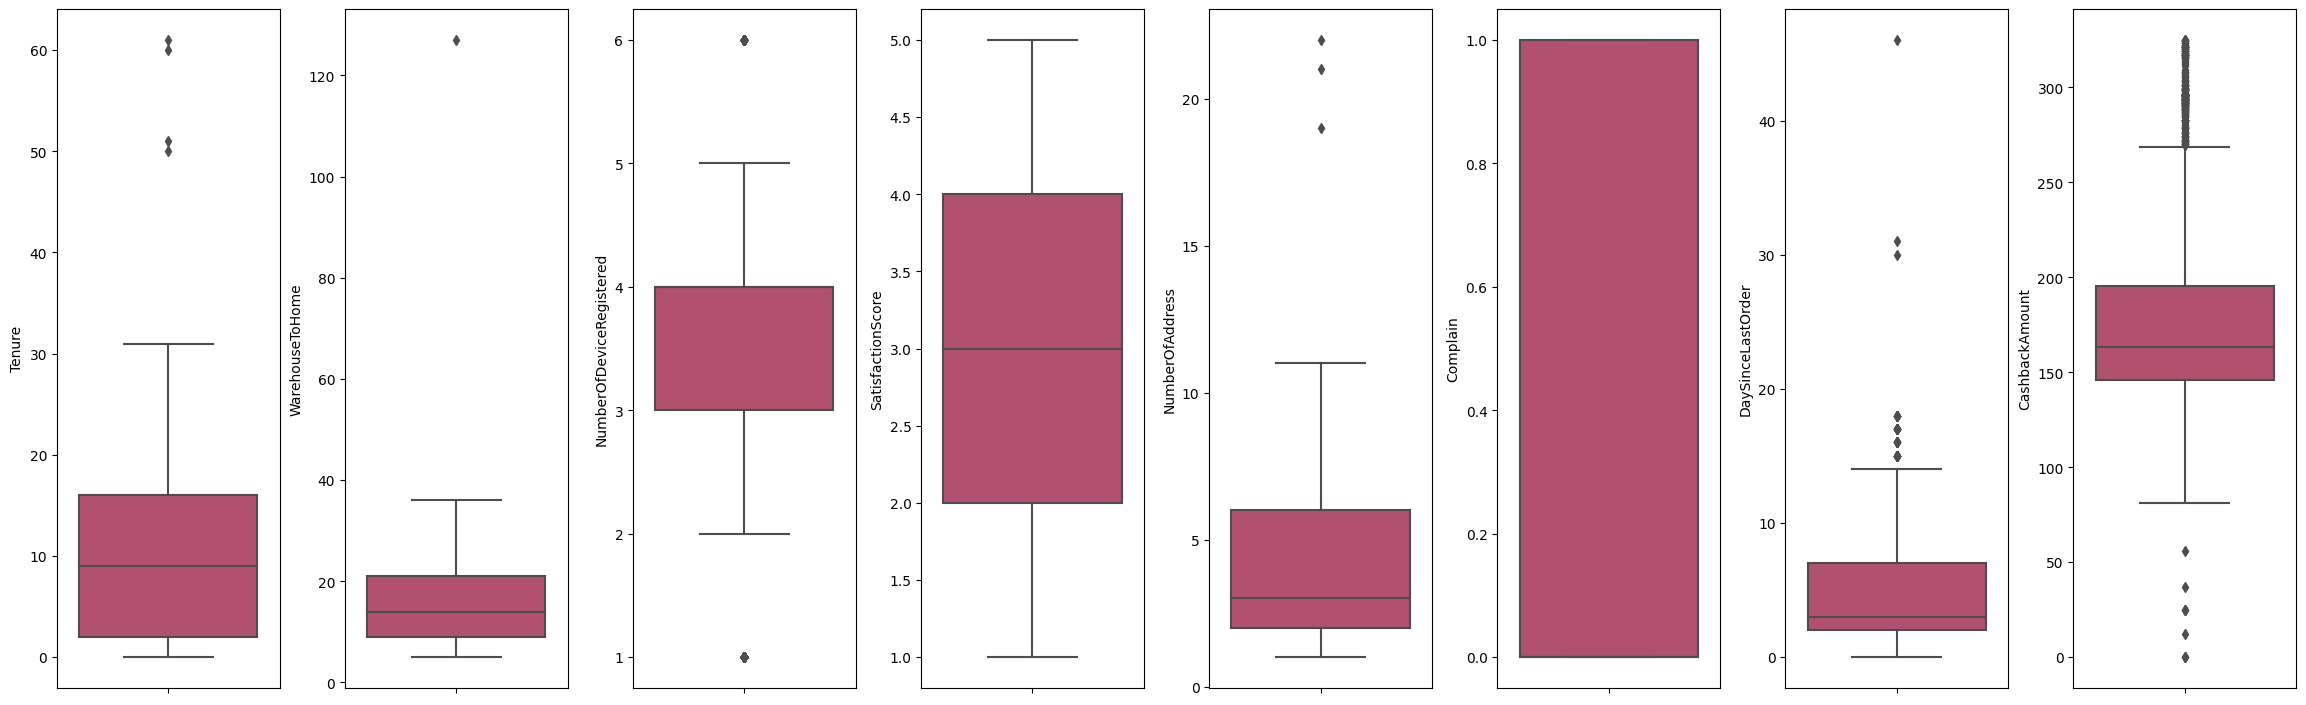

In [5]:
# Boxplot

numericCols = df.drop(columns='Churn').select_dtypes(include=[float, int]).columns

fig, ax = plt.subplots(ncols=8, nrows=1, figsize=(23,7))
index = 0
ax = ax.flatten()

for col in numericCols:
    sns.boxplot(y=col, data=df, ax=ax[index], palette='flare')
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

From the boxplot above we can se some columns has extreme outliers which has value far beyond the upper bound, those columns are: *WarehouseToHome*, *Tenure* and *DaySinceLastOrder*. In this case we try to capture extreme outliers value using IQR method with treshold (3 * IQR)

In [6]:
# WarehouseToHome Outliers

Q1 = df['WarehouseToHome'].quantile(0.25)
Q3 = df['WarehouseToHome'].quantile(0.75)
IQR = Q3 - Q1

# Threshold
threshold = 3 * IQR

# Indentify Outliers
outliersWH = (df['WarehouseToHome'] < Q1 - threshold) | (df['WarehouseToHome'] > Q3 + threshold)

# Extreme Outliers Value
outlierValuesWH = df.loc[outliersWH,'WarehouseToHome']
print(f'Outlier: {outlierValuesWH}')

Outlier: 2717    127.0
Name: WarehouseToHome, dtype: float64


for WarehouseToHome column we captured only one value that is defined as extreme outlier, *index 2717*

In [7]:
# NumberOfAddress Outliers

Q1 = df['NumberOfAddress'].quantile(0.25)
Q3 = df['NumberOfAddress'].quantile(0.75)
IQR = Q3 - Q1

# Threshold
threshold = 3 * IQR

# Indentify Outliers
outliersNOA = (df['NumberOfAddress'] < Q1 - threshold) | (df['NumberOfAddress'] > Q3 + threshold)

# Extreme Outliers Value
outlierValuesNOA = df.loc[outliersNOA,'NumberOfAddress']
print(f'Outlier: {outlierValuesNOA}')

Outlier: 1581    19
2109    22
3494    21
Name: NumberOfAddress, dtype: int64


for NumberOfAddress column we captured two value that are defined as extreme outliers, *index 1581, 2109 and 3494*

In [8]:
# Tenure Outliers

Q1 = df['Tenure'].quantile(0.25)
Q3 = df['Tenure'].quantile(0.75)
IQR = Q3 - Q1

# Threshold
threshold = 3 * IQR

# Indentify Outliers
outliersTN = (df['Tenure'] < Q1 - threshold) | (df['Tenure'] > Q3 + threshold)

# Extreme Outliers Value
outlierValuesTN = df.loc[outliersTN,'Tenure']
print(f'Outlier: {outlierValuesTN}')

Outlier: 51      61.0
1209    60.0
Name: Tenure, dtype: float64


for Tenure column we captured two value that are defined as extreme outliers, *index 51 & 1209*

In [9]:
# DaySinceLastOrder Outliers

Q1 = df['DaySinceLastOrder'].quantile(0.25)
Q3 = df['DaySinceLastOrder'].quantile(0.75)
IQR = Q3 - Q1

# Threshold
threshold = 3 * IQR

# Indentify Outliers
outliersDSL = (df['DaySinceLastOrder'] < Q1 - threshold) | (df['DaySinceLastOrder'] > Q3 + threshold)

# Extreme Outliers Value
outlierValuesDSL = df.loc[outliersDSL,'DaySinceLastOrder']
print(f'Outlier: {outlierValuesDSL}')

Outlier: 181     30.0
3591    46.0
3830    31.0
Name: DaySinceLastOrder, dtype: float64


for DaySinceLastOrder column we captured three value that are defined as extreme outliers, *index 181, 3591 & 3830*

In [10]:
# Extreme outliers index

display(outlierValuesWH.index, outlierValuesDSL.index, outlierValuesTN.index, outlierValuesNOA.index)

Int64Index([2717], dtype='int64')

Int64Index([181, 3591, 3830], dtype='int64')

Int64Index([51, 1209], dtype='int64')

Int64Index([1581, 2109, 3494], dtype='int64')

In this step, we will drop all the index that are captured above

In [11]:
df = df.drop(outlierValuesWH.index, axis=0)
df = df.drop(outlierValuesDSL.index, axis=0)
df = df.drop(outlierValuesTN.index, axis=0)
df = df.drop(outlierValuesNOA.index, axis=0)

In [12]:
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,NaN,4,Mobile,3,Married,10,1,0.0,124.37,1


We can see that the updated dataframe now only containing 3932 rows, the total is 6 rows dropped

## *`Missing Value`*

From the data description above, there are three columns has missing values they are Tenure, WarehouseToHome and DaySinceLastOrder. In order to fill ne NaN value we need to check the distribution to define what is  the best center weighted metering to use. We will execute this step after dropping outliers to ensure the outliers value not distorting the mean or median value in every column

In [13]:
df.isna().sum()

Tenure                      193
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

Text(0.5, 1.0, 'Tenure Displot')

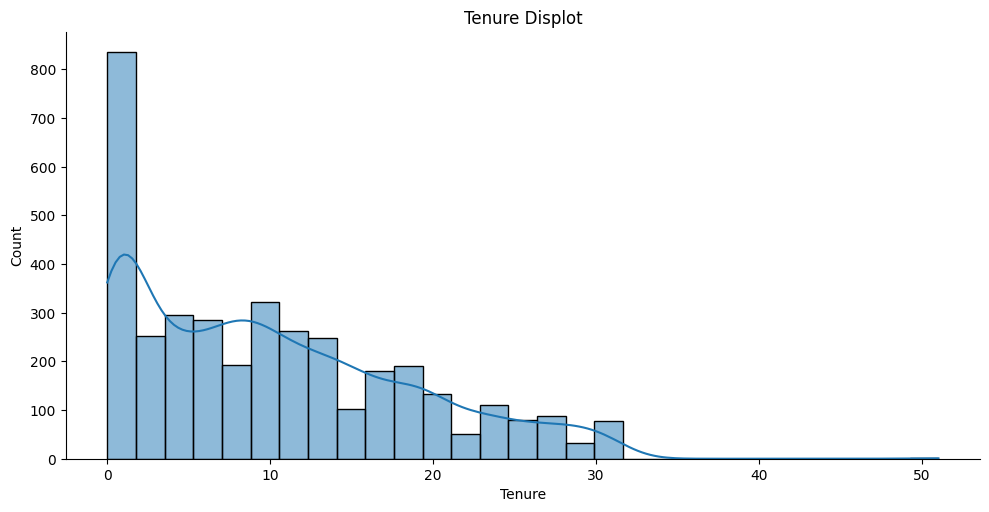

In [14]:
# Tenure

sns.displot(df['Tenure'], kde=True, aspect=2/1)
plt.title('Tenure Displot')

Tenure displot showing the data distribution is not normaly distributed, hence we use median to fill missing value

Text(0.5, 1.0, 'WarehouseToHome Displot')

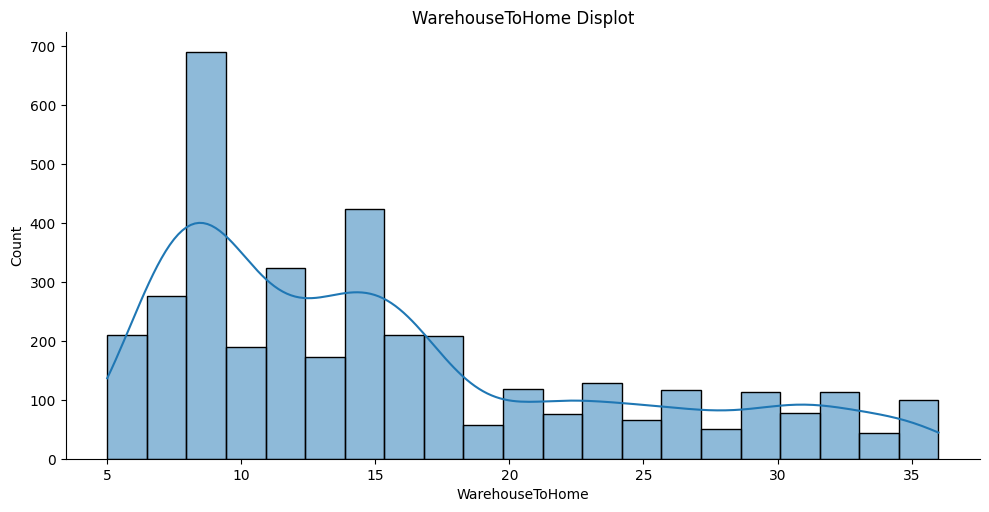

In [15]:
# WHtoHome

sns.displot(df['WarehouseToHome'], kde=True, aspect=2/1)
plt.title('WarehouseToHome Displot')

WarehouseToHome displot showing the data distribution is not normaly distributed, hence we use median to fill missing value

Text(0.5, 1.0, 'DaySinceLastOrder Displot')

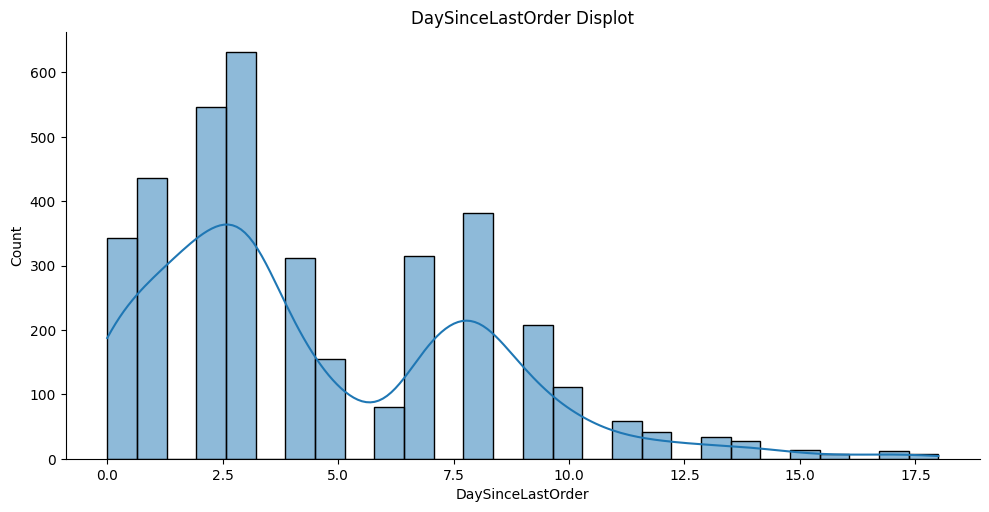

In [16]:
# DaySinceLastOrder

sns.displot(df['DaySinceLastOrder'], kde=True, aspect=2/1)
plt.title('DaySinceLastOrder Displot')

DaySinceLastOrder displot showing the data distribution is not normaly distributed, hence we use median to fill missing value

The distributuion plots shows us that all of the columns that has missing value are not normaly distributed, then we captured the median of every single column needed. We will fill the median with the median captured

In [17]:
# Fill Missing Value

medianTenure = df['Tenure'].median()
medianWH = df['WarehouseToHome'].median()
medianDSL = df['DaySinceLastOrder'].median()

for i in [medianTenure, medianWH, medianDSL]:
    for col in ['Tenure','WarehouseToHome','DaySinceLastOrder']:
        df[col] = df[col].fillna(i)

In [18]:
# NaN Check

df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

The info above is a final check after filling the missing value, we can see that all columns now has 0 missing value, with this condition we may proceed to the last step of data celaning

## *`Duplicated Rows`*

Duplicated row is one of the obstacle that we need to avoid in machine learning. By considering this step we can improve data quality, duplicated rows can introduce noise and redundancy into the dataset, which can affect the accuracy and reliability of the machine learning model. It will also hepls us to reduce overfitting, duplicated rows can lead to overfitting, where the model becomes too specialized to the training data and fails to generalize well to unseen data.

In [19]:
# Total Duplicated Rows

df.duplicated().sum()

671

In [20]:
# Check duplicated rows
duplicates = df.duplicated(keep=False)

# Filter the DataFrame to show duplicated rows
duplicatedRows = df[duplicates]
duplicatedRows.sort_values('CashbackAmount')

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3490,0.0,15.0,3,Mobile Phone,1,Single,2,0,0.0,110.81,1
2010,0.0,15.0,3,Mobile Phone,1,Single,2,0,0.0,110.81,1
95,0.0,30.0,1,Mobile Phone,5,Single,2,0,0.0,110.91,1
3166,0.0,30.0,1,Mobile Phone,5,Single,2,0,0.0,110.91,1
178,9.0,13.0,3,Mobile Phone,3,Married,2,0,0.0,112.74,0
...,...,...,...,...,...,...,...,...,...,...,...
3798,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
1669,14.0,14.0,4,Others,4,Single,3,0,9.0,323.33,0
296,14.0,14.0,4,Others,4,Single,3,0,9.0,323.33,0
2806,15.0,14.0,6,Others,3,Married,3,0,11.0,324.73,0


In [21]:
# Drop Duplicated Rows

df = df.drop_duplicates(keep='last')
df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,9.0,230.27,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.0,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.0,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0
3939,6.0,9.0,4,Mobile,3,Married,10,1,0.0,124.37,1


In this step we can ensure no more duplicated rows and missing value

# **EDA**

### *`Tenure`*

In [22]:
df[df['NumberOfAddress']==21]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn


Text(0, 0.5, 'Churn')

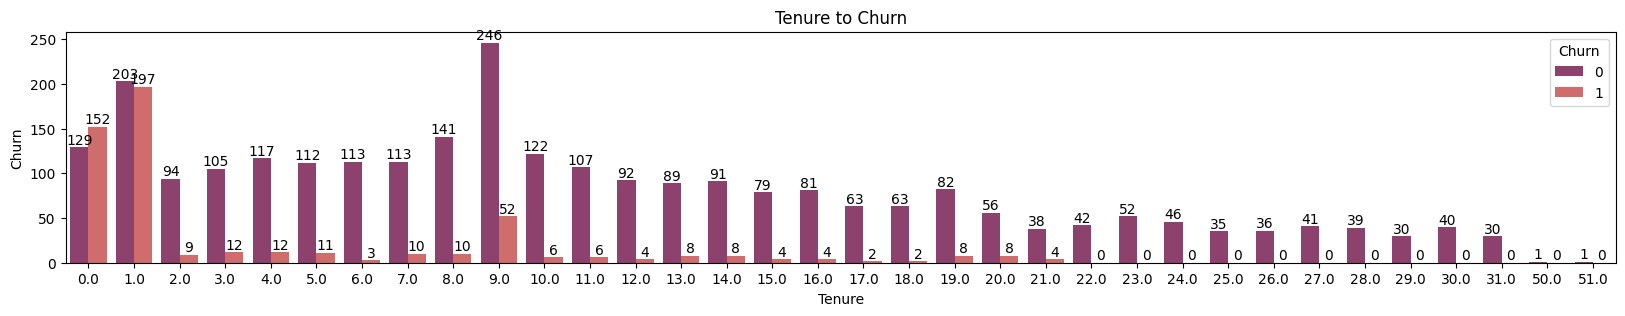

In [23]:
# Create Tenure Barplot

plt.figure(figsize=(20,3))
sns.set_style()

ax= sns.barplot( data=df,
    x= 'Tenure',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')

# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

plt.title('Tenure to Churn')
plt.xlabel('Tenure')
plt.ylabel('Churn')


With this barplot we can see that the shortest customer's tenure tend to affect churn more. The 0 tenure has more churn customer than  the others, with this case we can say that this type of customer is only the single time buyer and not using the platform anymore. Otherwise the longer customer's tenure has very low count of churn, means this is the visualization of loyal customers

### *`Warehouse to Home Distance`*

Text(0, 0.5, 'Churn')

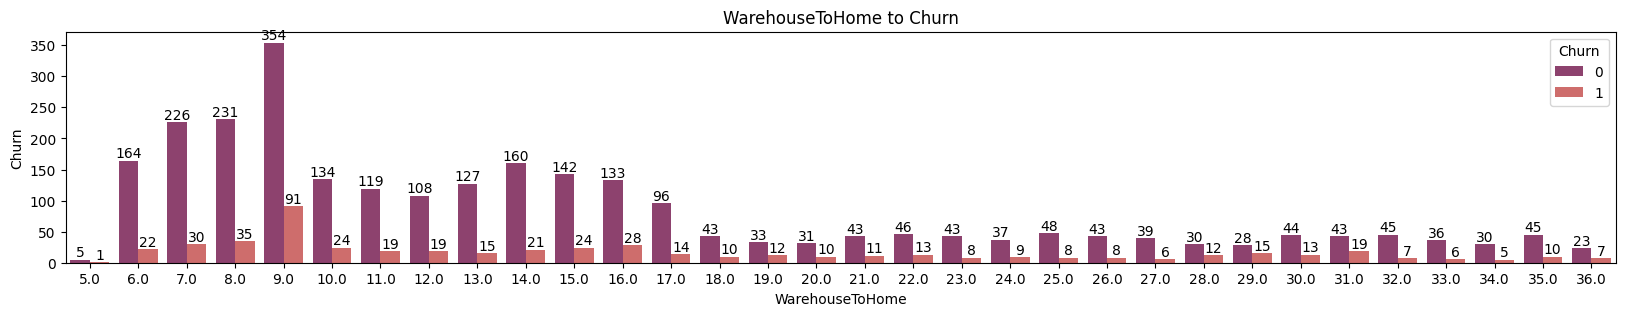

In [24]:
# Create WarehouseToHome Barplot

plt.figure(figsize=(20,3))

ax= sns.barplot(
    data=df,
    x= 'WarehouseToHome',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')
    
# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

plt.title('WarehouseToHome to Churn')
plt.xlabel('WarehouseToHome')
plt.ylabel('Churn')

In [25]:
df['WarehouseToHome'].median()

13.0

The plot of distance from warehouse to customer's house showing us that the longer the distance doesn't affect the churn rate much, there is no churn is higher than not churn. This proves that longer distance or delivery time doesn't leads to high churn rate. The most common distance is 9 and median of distance is 13

### *`Number of Device Registered`*

Text(0, 0.5, 'Churn')

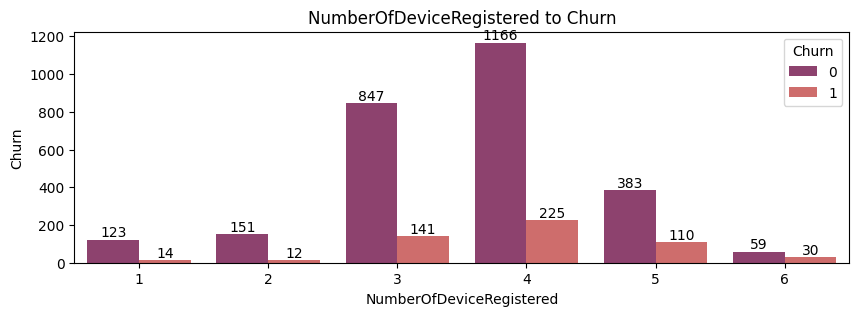

In [26]:
# Create Tenure Barplot

plt.figure(figsize=(10,3))

ax= sns.barplot(
    data=df,
    x= 'NumberOfDeviceRegistered',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')

# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')


plt.title('NumberOfDeviceRegistered to Churn')
plt.xlabel('NumberOfDeviceRegistered')
plt.ylabel('Churn')

In [27]:
# Percentage of Churn

pctNDR = []
for i in range(1,7):
    pctNDR.append((((df['NumberOfDeviceRegistered']==i) & (df['Churn']==1)).sum() / (df['NumberOfDeviceRegistered']==i).sum()*100))

NDRChurnPct = pd.DataFrame({'NumOfDeviceReg':['1', '2', '3', '4', '5', '6'],'Churn Percentage':pctNDR})
NDRChurnPct

,NumOfDeviceReg,Churn Percentage
0,1,10.218978
1,2,7.361963
2,3,14.271255
3,4,16.175413
4,5,22.312373
5,6,33.707865


This visualization showing that the highest count of device registered is 4 device and also contribute to highest churn count by category. Even so, proportion wise the 4 device is not the highest among all, the highest is 6 device and the lowest is 2 device. From this pattern we can say the more device registered has tendecy to be a churn customer, we also can see the percentage is increasing as the device goes up.

### *`Prefered Order Category`*

Text(0, 0.5, 'Churn')

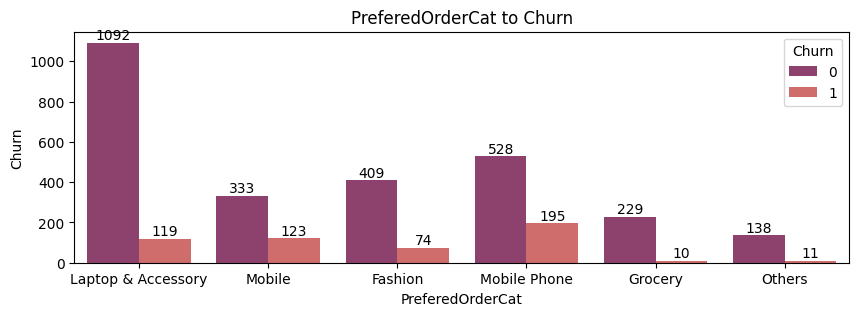

In [28]:
# Create PreferedOrderCat Barplot

plt.figure(figsize=(10,3))

ax= sns.barplot(
    data=df,
    x= 'PreferedOrderCat',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')

# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

plt.title('PreferedOrderCat to Churn')
plt.xlabel('PreferedOrderCat')
plt.ylabel('Churn')

This section shows us the category that is most favorable to customer is Laptop & Accesory. Churn count wise we can see that Grocery and Others are the categories with a very low count of churn

### *`Satisfaction Score`*

Text(0, 0.5, 'Churn')

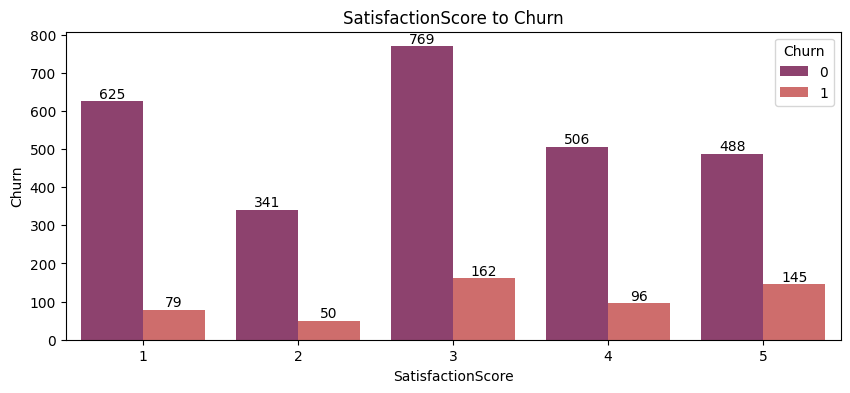

In [29]:
# Create SatisfactionScore Barplot

plt.figure(figsize=(10,4))

ax= sns.barplot(
    data=df,
    x= 'SatisfactionScore',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')

# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

plt.title('SatisfactionScore to Churn')
plt.xlabel('SatisfactionScore')
plt.ylabel('Churn')

In [30]:
# Percentage of Satisfaction Score

pctSS = []
for i in range(1,6):
    pctSS.append((((df['NumberOfDeviceRegistered']==i) & (df['Churn']==1)).sum() / (df['NumberOfDeviceRegistered']==i).sum()*100))

SSChurnPct = pd.DataFrame({'NumOfDeviceReg':['1', '2', '3', '4', '5'],'Churn Percentage':pctSS})
SSChurnPct

,NumOfDeviceReg,Churn Percentage
0,1,10.218978
1,2,7.361963
2,3,14.271255
3,4,16.175413
4,5,22.312373


Highest satisfaction score count is 3 which is the moderate score, but we can see that is the more considerable to churn rate is the highest score which is 5 with 22.3% of churn rate

### *`Marital Status`*

Text(0, 0.5, 'Churn')

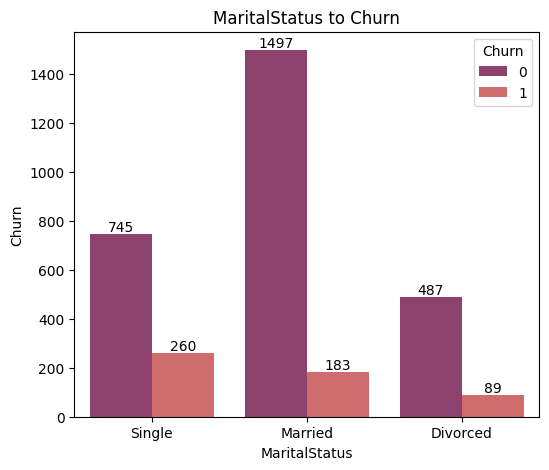

In [31]:
# Create MaritalStatus Barplot

plt.figure(figsize=(6,5))

ax= sns.barplot(
    data=df,
    x= 'MaritalStatus',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')

# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

plt.title('MaritalStatus to Churn')
plt.xlabel('MaritalStatus')
plt.ylabel('Churn')

The dar plot above showing that customer who are single has highest count of churn

### *`Number of Address`*

Text(0, 0.5, 'Churn')

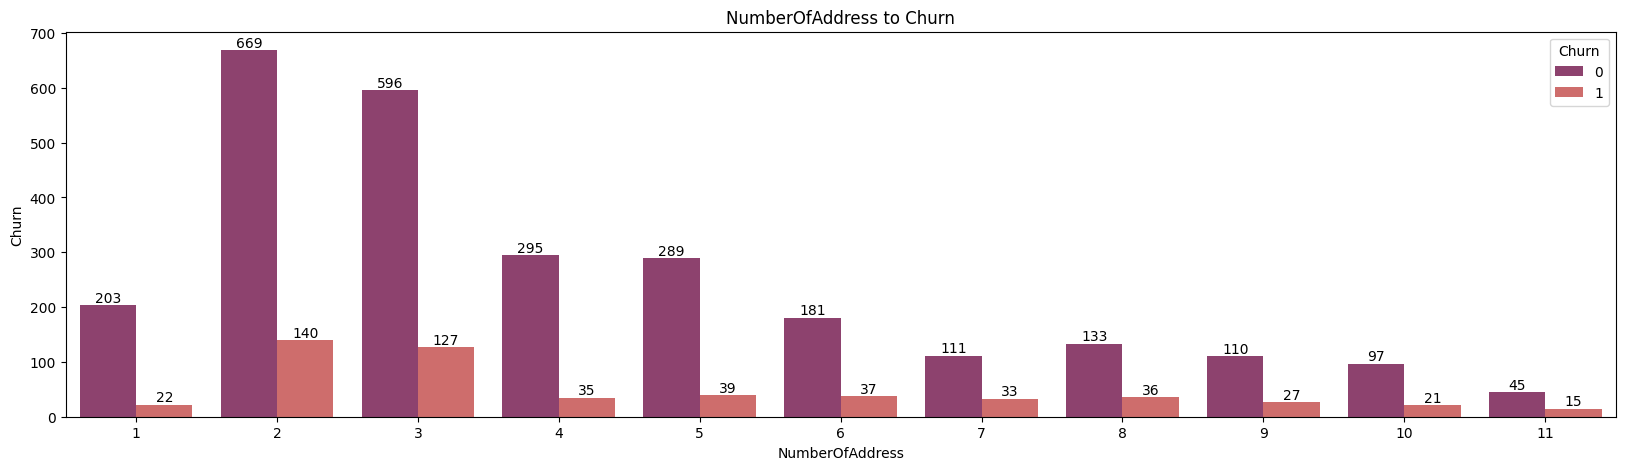

In [32]:
# Create NumberOfAddress Barplot

plt.figure(figsize=(20,5))

ax= sns.barplot(
    data=df,
    x= 'NumberOfAddress',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')

# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

plt.title('NumberOfAddress to Churn')
plt.xlabel('NumberOfAddress')
plt.ylabel('Churn')

In [33]:
# Percentage of Satisfaction Score

pctNAC = []
for i in range(1,12):
    pctNAC.append((((df['NumberOfAddress']==i) & (df['Churn']==1)).sum() / (df['NumberOfAddress']==i).sum()*100))

NACChurnPct = pd.DataFrame({'NumOfAdd':['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'],'Churn Percentage':pctNAC})
NACChurnPct.T

,0,1,2,3,4,5,6,7,8,9,10
NumOfAdd,1,2,3,4,5,6,7,8,9,10,11
Churn Percentage,9.777778,17.305315,17.565698,10.606061,11.890244,16.972477,22.916667,21.301775,19.708029,17.79661,25.0


We can see here that the 2 Address is the highest contributor to churn count. Otherwise the highest percentage of churn is 11 Address

### *`Complain`*

Text(0, 0.5, 'Churn')

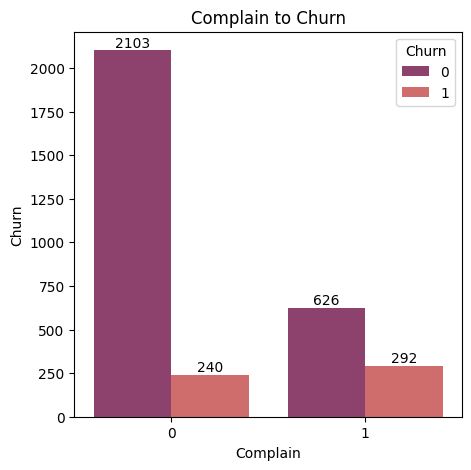

In [34]:
# Create Complain Barplot

plt.figure(figsize=(5,5))

ax= sns.barplot(
    data=df,
    x= 'Complain',
    y= 'Churn',
    estimator=len,
    hue='Churn',
    palette='flare_r')

# Value lable
for i in range(0,2):
    for bar in ax.containers[i]:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                round(bar.get_height()),
                ha='center', va='bottom')

plt.title('Complain to Churn')
plt.xlabel('Complain')
plt.ylabel('Churn')

In [35]:
# Percentage of Satisfaction Score

pctComp = []
for i in range(0,2):
    pctComp.append((((df['Complain']==i) & (df['Churn']==1)).sum() / (df['Complain']==i).sum()*100))
CompChurnPct = pd.DataFrame({'Complain':['1', '2'],'Churn Percentage':pctComp})
CompChurnPct

,Complain,Churn Percentage
0,1,10.243278
1,2,31.808279


The plot tells us the highest percentage of churn is the customer with complain at **31.8%**

# **Imbalance**

For a better result in modeling we need to see the dataset has an imbalance target or not. In this terms we will do proportion checking on target which is **Churn** columns

In [36]:
# Create Proportion DF

churnPie = df['Churn'].value_counts()
churnPie = pd.DataFrame(churnPie)
churnPie

,Churn
0,2729
1,532


The initial count showing that **class 0: not churn has more count that class 1: churn**, let's see in pie chart form

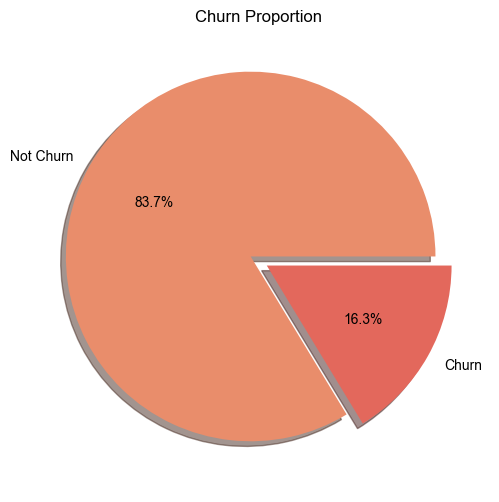

In [37]:
# Imbalance in Pie Chart

plt.figure(figsize=(6,6))
plt.title('Churn Proportion')

plt.pie(x=churnPie['Churn'],
        autopct=f'%1.1f%%',
        shadow=True,
        labels=['Not Churn','Churn'],
        colors=sns.color_palette('flare'),
        explode=(0.05,0.05))
sns.set_style('whitegrid')


Imbalance checking with proportion showing that the Churn is imbalance, treatment needed for this situation. Imbalance treatment will applied in the pipline while we arrange the modeling

# **Data Preprocessing**

Data prepocesing step is the step where we process cleaned data into the transformed data to be fitted for model testing.<br>
Initially we would like to do checking into each data type and value, hence we able to decide what to do in preprocessing.<br>
Let's look again to cleaned data to ensure the data is clean and to identify the data type.

In [38]:
# Columns Description

dataDesc()

,Column,Data Type,Missing Value,Pct Missing Value,Num Unique,Unique Sample,Min Val,Max val
0,Tenure,float64,0,0.0,34,"[28.0, 51.0]",0.0,51.0
1,WarehouseToHome,float64,0,0.0,32,"[14.0, 18.0]",5.0,36.0
2,NumberOfDeviceRegistered,int64,0,0.0,6,"[1, 6]",1,6
3,PreferedOrderCat,object,0,0.0,6,"[Laptop & Accessory, Fashion]",Fashion,Others
4,SatisfactionScore,int64,0,0.0,5,"[2, 4]",1,5
5,MaritalStatus,object,0,0.0,3,"[Single, Married]",Divorced,Single
6,NumberOfAddress,int64,0,0.0,11,"[9, 2]",1,11
7,Complain,int64,0,0.0,2,"[1, 0]",0,1
8,DaySinceLastOrder,float64,0,0.0,19,"[12.0, 15.0]",0.0,18.0
9,CashbackAmount,float64,0,0.0,2332,"[127.56, 139.78]",0.0,324.99


From this latest update to dataframe we can see the data is all filled. We alse can get information that there are two categorical columns ('PreferedOrderCat' & 'MaritalStatus'), these columns will be encoded to numercal. The rest of features ('Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount') excepet 'Complain', will be scaled to get the numerical value prportionally. 

Encode:
- Binary Encoder:
    - 'PreferedOrderCat'
- One Hot Encoder:
    - 'MaritalStatus'<br>

Scale:
- Robust Scaler:
    - 'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'

We consider tu use Binary Encoder for 'PreferedOrderCat' due to this column has more than 5 category, and we can use One Hot Encoder for 'MaritalStatus' due to this column only contains 3 category. For Scaler we can use Robust Scaler because the data is not normally distributed.

### *`Train Test Set`*

In [39]:
# Define X and y

X = df.drop(columns=['Churn'])
y = df['Churn']

In [40]:
# Split

xTrain, xTest, yTrain, yTest = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=20,
                                                stratify=y)

In this step we define variable X as a features and y as a response / target. For the splitting process we set the test size at 20% and also need to set stratify=y to ensures that the splitting process maintains the proportion of different classes in the target variable.

In [41]:
# transformer 

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'),['MaritalStatus']),
    ('binary', BinaryEncoder(),['PreferedOrderCat']),
    ('robust', RobustScaler(), ['Tenure','WarehouseToHome','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','DaySinceLastOrder','CashbackAmount'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehot', OneHotEncoder(drop='first'),
                                 ['MaritalStatus']),
                                ('binary', BinaryEncoder(),
                                 ['PreferedOrderCat']),
                                ('robust', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount'])])

The code above is to transform the encoding and scaling process to the features, we also need to put remainder 'passthrough' to still involve the other column without any encoding or scaling

In [42]:
dfTransformed = pd.DataFrame(transformer.fit_transform(xTrain),columns=transformer.get_feature_names_out())
dfTransformed.head()

,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,binary__PreferedOrderCat_0,binary__PreferedOrderCat_1,binary__PreferedOrderCat_2,robust__Tenure,robust__WarehouseToHome,robust__NumberOfDeviceRegistered,robust__SatisfactionScore,robust__NumberOfAddress,robust__DaySinceLastOrder,robust__CashbackAmount,remainder__Complain
0,1.0,0.0,0.0,0.0,1.0,0.333333,-0.3,1.0,0.0,-0.25,0.666667,-0.160090,0.0
1,1.0,0.0,0.0,1.0,0.0,-0.666667,-0.6,0.0,-1.0,2.00,-0.166667,0.175523,1.0
2,0.0,1.0,0.0,0.0,1.0,0.166667,-0.4,-1.0,-1.0,1.50,-0.666667,0.092303,1.0
3,1.0,0.0,0.0,1.0,0.0,-0.583333,-0.3,0.0,0.5,0.00,-0.500000,-0.201700,0.0
4,1.0,0.0,0.0,1.0,1.0,0.166667,-0.4,-1.0,0.0,0.00,0.500000,-0.729342,1.0


From the dataframe above we can see the final preprocessed data

# **Model Benchmarking**

Models that we will test are 7 models with default paramater and set all in the same random_state = 20

In [43]:
# Models

logReg = LogisticRegression(random_state=20)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=20)
rf = RandomForestClassifier(random_state=20)
xgb = XGBClassifier(random_state=20, use_label_encoder=False,)
lgbm = lgb.LGBMClassifier(random_state=20)
svc = SVC(random_state=20)

In [44]:
# Cross Validation

models = [logReg,knn,dt,rf,xgb,lgbm,svc]
meanCV=[]
stdCV=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    modelCV=cross_val_score(estimator,xTrain,yTrain,cv=skfold,scoring='recall')
    meanCV.append(modelCV.mean())
    stdCV.append(modelCV.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVC'],'mean recall':meanCV,'sdev':stdCV}).set_index('model').sort_values(by='mean recall',ascending=False)

,mean recall,sdev
model,,
LightGBM,0.663529,0.024225
XGBoost,0.661176,0.025123
Decision Tree,0.642353,0.053964
Random Forest,0.595294,0.050245
Logistic Regression,0.468235,0.064610
SVC,0.414118,0.056861
KNN,0.362353,0.061086


Form the initial cross validation test we find that the LightGBM is the best model but the recall score is quite low at **0.663**, from this condition we consider to do a treatment for imbalance data in the next step

# **Imbalance Treatment**

This stages required due to the minority negative class proportion is imbalance compare to the positive. We will approach this Imbalance dataset using SMOTE methods. SMOTE is an effective method for addressing class imbalance in machine learning datasets. By oversampling the minority class, it helps balance the class distribution, improves the learning and generalization of the model, reduces the risk of misclassification, and provides more reliable evaluation metrics.

In [45]:
models = [logReg,knn,dt,rf,xgb,lgbm,svc]
meanIMB=[]
stdIMB=[]

# Loop models for Imbalance Treatment
for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('smote', SMOTE(random_state=20)),
        ('model',i)])
    modelCvIMB=cross_val_score(estimator,xTrain,yTrain,cv=skfold,scoring='recall')
    meanIMB.append(modelCvIMB.mean())
    stdIMB.append(modelCvIMB.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'SVC'],'mean recall':meanIMB,'sdev':stdIMB}).set_index('model').sort_values(by='mean recall',ascending=False)


,mean recall,sdev
model,,
Logistic Regression,0.797647,0.034421
SVC,0.788235,0.031568
KNN,0.752941,0.019686
XGBoost,0.705882,0.019686
Random Forest,0.689412,0.015958
LightGBM,0.684706,0.032773
Decision Tree,0.668235,0.038231


The result of imbalance treatment quite effective to get a better recall score, we can also find that the best scoring model has changed to Logistic Regression with **0.798** and the second best is SVC with **0.788**.<br>
With this result we will try to do Hyperparameter Tuning for **`Logistic Regression`** and **`SVC`** model.

# **Hyperparameter Tuning: Logistic Regression**

Hyperparameter tuning needed to improve recall score by matching parameters and get best combination of parameters. The method we will try to use is Grid Search, Grid search performs an exhaustive search over a specified parameter grid, trying out all possible combinations of hyperparameters. This ensures that no combination is missed, and the search space is thoroughly explored. It helps in finding the best hyperparameter values for the given problem.

The first model that we will put into a tuning is Logistic Regression, we gather all common parameters possible to generate the best combination.<br><br>
**Paramaters**:
- penalty
- C
- solver
- max_iter

In [58]:
# Pipeline
pipelineTLR = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=20)),
    ('model', logReg)])

# Define Hyperparameters for LogReg
hyperparametersLogReg = {
    'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'model__C': [0.1, 1, 10, 100],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__max_iter': [100, 1000, 5000, 10000]}

# Create GridSearchCV
gridLR = GridSearchCV(pipelineTLR, hyperparametersLogReg, cv=5, scoring='recall', verbose=1)

# Fit to Train data
gridLR.fit(xTrain, yTrain)

# Get the best parameters
bestParamsLR = gridLR.best_params_
bestModelLR = gridLR.best_estimator_

print(f"Best parameters: {bestParamsLR}")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best parameters: {'model__C': 0.1, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


Hyperparameter Tuning result for Logistic Regression suggesting to use these parameters.<br><br>
**Best Paramaters**:
- penalty : `'l1'`
- C : `0.1`
- solver : `'liblinear'`
- max_iter : `100`

We will try to apply all parameters above to the model in the nex step

# **Hyperparameter Tuning: SVC**

The second model that we will put into a tuning is SVC (Support Vector Classifier), we gather all common parameters possible to generate the best combination.<br><br>
**Paramaters**:
- C
- kernel
- gamma
- shrinking

In [59]:
# Pipeline
pipelineTSVC = Pipeline([
    ('preprocess', transformer),
    ('smote', SMOTE(random_state=20)),
    ('model', svc)])

# Define Hyperparameters for SVC
hyperparametersSVC = {
    'model__C': np.arange(0.01, 10.01, 1),
    'model__kernel': ['linear','poly','rbf','sigmoid'],
    'model__gamma': ['auto','scale'],
    'model__shrinking': [True,False]}

# Create GridSearchCV object
gridSVC = GridSearchCV(pipelineTSVC, hyperparametersSVC, cv=5, scoring='recall', verbose=1)

# Fit to Train data
gridSVC.fit(xTrain, yTrain)

# Get the best parameters
bestParamsSVC = gridSVC.best_params_
bestModelSVC = gridSVC.best_estimator_

print(f"Best parameters: {bestParamsSVC}")

Fitting 5 folds for each of 160 candidates, totalling 800 fits


Best parameters: {'model__C': 0.01, 'model__gamma': 'auto', 'model__kernel': 'poly', 'model__shrinking': True}


Hyperparameter Tuning result for SVC suggesting to use these parameters.<br><br>
**Best Paramaters**:
- C : `0.01`
- kernel : `'poly'`
- gamma : `'auto'`
- shrinking : `True`

We will try to apply all parameters above to the model in the nex step

# **Test After Tuning: LogReg**

In this stage we will do a model testing to Train set and Test set using the best LogReg parameters, to be able capturing model versatility and characteristic wheter it's underfitting or overfitting

In [48]:
# Set LogReg Params
logRegTuning = LogisticRegression(C=0.1, max_iter=100, penalty='l1', solver='liblinear')

# Pipeline
estimatorTLR=Pipeline([
    ('preprocess',transformer),
    ('smote', SMOTE(random_state=20)),
    ('model',logRegTuning)])

# Fit to Train data
estimatorTLR.fit(xTrain, yTrain)

# LogReg Recall score for Train set
trainPredTunnedLR = estimatorTLR.predict(xTrain)
trainRecallTunnedLR = recall_score(yTrain, trainPredTunnedLR)

# LogReg Recall score for Test set
testPredTunnedLR = estimatorTLR.predict(xTest)
testRecallTunnedLR = recall_score(yTest, testPredTunnedLR)

# Create LogReg Result DF
dfResultTunnedLR = pd.DataFrame({
    'model': ['Logistic Regression'],
    'Train Recall': [trainRecallTunnedLR],
    'Test Recall': [testRecallTunnedLR],
}).set_index('model')

# DF LogReg Tunned
pd.DataFrame(dfResultTunnedLR)

,Train Recall,Test Recall
model,,
Logistic Regression,0.807059,0.831776


The result showing that Train and Test recall score is quite near and the score is fairly good at **`0.807 for Train and 0.832 for Test`**, this is a good result but the improvement is not really significat compare to the imbalance treated model testing. Even so, we need to try the second best model tu be tunned in the next step.

# **Test After Tuning: SVC**

In this stage we will do a model testing to Train set and Test set using the best SVC parameters, to be able capturing model versatility and characteristic wheter it's underfitting or overfitting

In [61]:
# Instantiate logistic regression with the best parameters
svcTuning = SVC(C=0.01, gamma= 'auto', kernel= 'poly', shrinking= True)

# Pipeline
estimatorTSVC=Pipeline([
    ('preprocess',transformer),
    ('smote', SMOTE(random_state=20)),
    ('model', svcTuning)])

# Fit to Train data
estimatorTSVC.fit(xTrain, yTrain)

# SVC Recall score for Train set
trainPredTunnedSVC = estimatorTSVC.predict(xTrain)
trainRecallTunnedSVC = recall_score(yTrain, trainPredTunnedSVC)

# SVC Recall score for Test set
testPredTunedSVC = estimatorTSVC.predict(xTest)
testRecallTunnedSVC = recall_score(yTest, testPredTunedSVC)

# Create SVC Result DF
dfResultTunnedSVC = pd.DataFrame({ 
    'model': ['SVC'],
    'Train Recall': [trainRecallTunnedSVC],
    'Test Recall': [testRecallTunnedSVC],
}).set_index('model')

# DF SVC Tunned
pd.DataFrame(dfResultTunnedSVC)

,Train Recall,Test Recall
model,,
SVC,0.981176,0.981308


The result showing that Train and Test recall score is quite near and the score is fairly good at **`0.9811 for Train and 0.9813 for Test`**. Both result are impressive considering the recall score gap is very small just by **0.000132** poin. By this result, we highly consider to pick SVC models and it's all parameters suggested as the best model to predict customer churn in the next other cases.

# **Confusion Matrix**

To retrieve a prove of this tunned SVC model, we can do the calculation on False Negative Rate improvement compare to inital modeling. Using a confusion matix is the proper way to visualize the result and clearly showing the difference between both matrix<br>

Confusion matrix default layout:<br>
### **[TN , FP]**<br>
### **[FN , TP]**<br>

- TP : True Positive
- TN : True Negative
- FP : False Positive
- FN : Fals Negative

In this cahe we will calculate FN rate using FNR formula: **FN/(TP+FN)**

In [51]:
# Default SVC before Imbalance and Tuning

initialEstimator=Pipeline([
        ('preprocess',transformer),
        ('model',svc)])

initialEstimator.fit(xTrain, yTrain)
testPredInitial = initialEstimator.predict(xTest)

array([[533,  13],
       [ 61,  46]], dtype=int64)

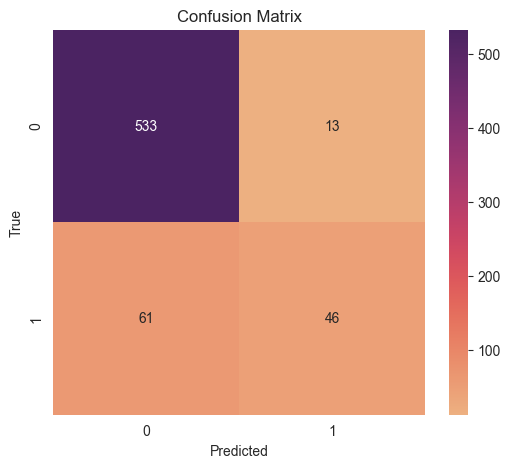

In [52]:
# Default Model Benchmarking

cmDefault = confusion_matrix(yTest, testPredInitial)
display(cmDefault)

# Convert to heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cmDefault, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Calculating default FN rate

defaultFNRate = 61/(46+61)
print(f'False Negative Rate : {round(defaultFNRate*100,2)}%')

False Negative Rate : 57.01%


From the confusion matrix of initial test above, the False negative rate is still low at **57.01%**

array([[ 82, 464],
       [  2, 105]], dtype=int64)

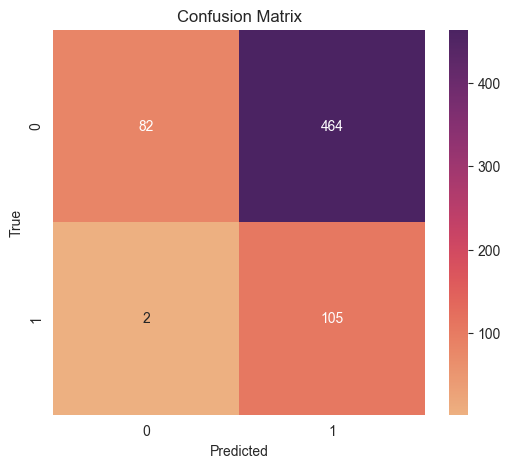

In [54]:
# After Tuning SVC

cmTunned = confusion_matrix(yTest, testPredTunedSVC)
display(cmTunned)

# Convert to heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cmTunned, annot=True, fmt='d', cmap='flare')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [55]:
# Calculating tunned FN rate

tunnedFNRate = 2/(105+2)
print(f'False Negative Rate : {round(tunnedFNRate*100,2)}%')

False Negative Rate : 1.87%


In [56]:
# False Negative rate reduction

(defaultFNRate-tunnedFNRate)*100

55.140186915887845

From the confusion matrix of tunned test above, the False negative rate is significantly improved at **1.87%**, means we managed to reduce False Negative rate by **55.14%**

# **Feature Importances**

,Feature,Importance
9,CashbackAmount,0.058129
0,Tenure,0.039571
3,PreferedOrderCat,0.019325
2,NumberOfDeviceRegistered,0.008742
6,NumberOfAddress,0.007515
8,DaySinceLastOrder,0.006250
5,MaritalStatus,0.005215
7,Complain,0.001687
1,WarehouseToHome,0.000997
4,SatisfactionScore,0.000268


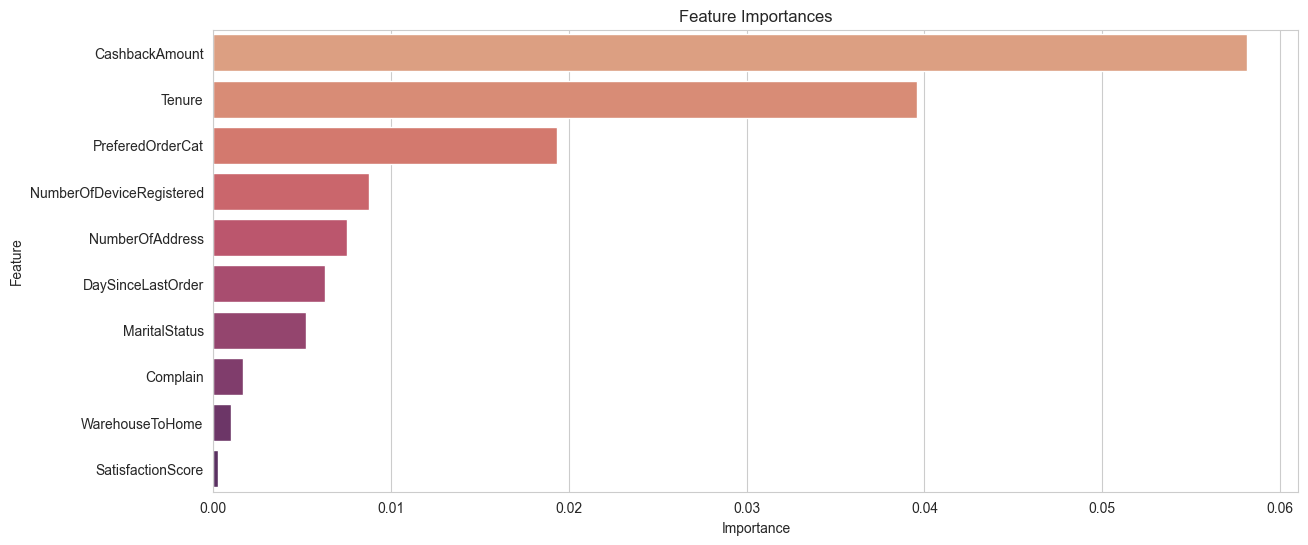

In [57]:
# Calculate permutation importances
result = permutation_importance(estimatorTSVC, xTrain, yTrain, n_repeats=10, random_state=20)

# Get feature importances
importances = result.importances_mean

# Feature Importance DF
importanceDf = pd.DataFrame({'Feature': xTrain.columns, 'Importance': importances})

# Sort descending
importanceDf = importanceDf.sort_values(by='Importance', ascending=False)
display(importanceDf)

# Plot feature importances
plt.figure(figsize=(14, 6))
sns.barplot(x='Importance', y='Feature', data=importanceDf,palette='flare')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

From the barplot above we can see what features are contributing the most to the target usinge machine learning model, it helps us to define what sector we need to recommend for improvement.<br>
The top three of feature importances are **CashbackAmount, Tenure and PreferedOrderCat**, which are great result for us to consider these feature in order to gather deeper analysis information for improvement recommendation.

# **Conclusion & Recommendation**

### *`Conclusion`*

- Use all columns as feature
- Preprocessing data using endocer and scaler
- Initial model testing resulting LightGBM and XGBoost as top two model
- Imbalance treatment resulting better score with LogReg and SVC as the best two model
- Tunnig result: SVC as best model and parameter to get best recall score of **98.11%**
- Confussion Matrix proves that we managed to reduce False Negative rate by **55.14%**
- Top 3 features contributing are: **CashbackAmount, Tenure and PreferedOrderCat**

### *`Recommendation`*

- To improve recall score better we need to consider adding feature that are more representing customer behaviors
- We can consider to use this model to do a future prediction of potential Churn customer, to be able set most efficient strategies to minimize the Churn rate
- Prioritizing on **CashbackAmount, Tenure and PreferedOrderCat** features to gather best customer retention plan in the future